# K-Mode Clustering on Bank Marketing Dataset

The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls. Often, more than one contact to the same client was required, in order to access if the product (bank term deposit) would be ('yes') or not ('no') subscribed.

**Attribute Information(Categorical):**

- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
- contact: contact communication type (categorical: 'cellular','telephone') 
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
- UCI Repository: <https://archive.ics.uci.edu/ml/datasets/bank+marketing>

In [1]:
#pip install kmodes

In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from kmodes.kmodes import KModes
import warnings
warnings.filterwarnings("ignore") 

In [3]:
df = pd.read_csv('bankmarketing.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [5]:
bank_cust = df[['age','job', 'marital', 'education', 'default', 'housing', 'loan','contact','month','day_of_week','poutcome']]
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [6]:
print(df.age.max())
print("_"*69)
print(df.age.min())

98
_____________________________________________________________________
17


In [7]:
#Chnaging age to categorial data into bins
bank_cust["age_bin"]=pd.cut(df["age"],bins=[0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100],
                    labels=['0-10','10-20' '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100','100-110'])
bank_cust.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,60-70
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,60-70
2,37,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,40-50
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,40-50
4,56,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,60-70


In [8]:
bank_cust  = bank_cust.drop('age',axis = 1)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,60-70
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,60-70
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,40-50
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,40-50
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,60-70


In [9]:
bank_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   job          41188 non-null  object  
 1   marital      41188 non-null  object  
 2   education    41188 non-null  object  
 3   default      41188 non-null  object  
 4   housing      41188 non-null  object  
 5   loan         41188 non-null  object  
 6   contact      41188 non-null  object  
 7   month        41188 non-null  object  
 8   day_of_week  41188 non-null  object  
 9   poutcome     41188 non-null  object  
 10  age_bin      41188 non-null  category
dtypes: category(1), object(10)
memory usage: 3.2+ MB


In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
bank_cust = bank_cust.apply(le.fit_transform)
bank_cust.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,3,1,0,0,0,0,1,6,1,1,5
1,7,1,3,1,0,0,1,6,1,1,5
2,7,1,3,0,2,0,1,6,1,1,3
3,0,1,1,0,0,0,1,6,1,1,3
4,7,1,3,0,0,2,1,6,1,1,5


In [11]:
# count the unique vlaue of all the variable
for i in bank_cust.columns:
    print(i,len(bank_cust[i].unique()))

job 12
marital 4
education 8
default 3
housing 3
loan 3
contact 2
month 10
day_of_week 5
poutcome 3
age_bin 9


# Checking the count per category

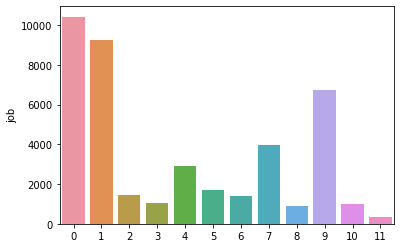

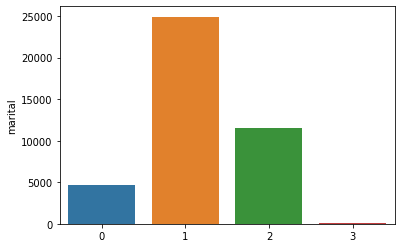

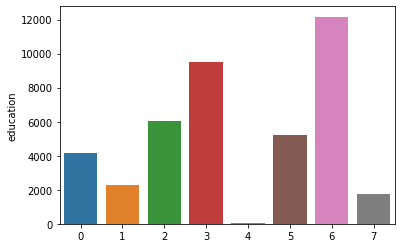

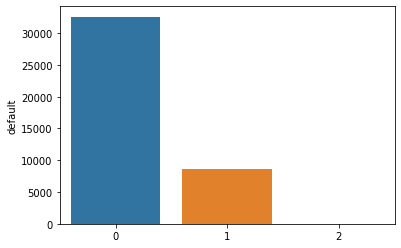

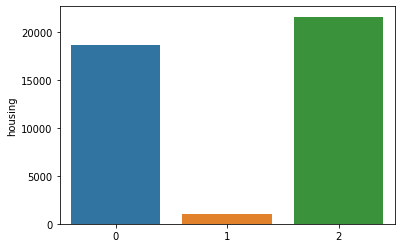

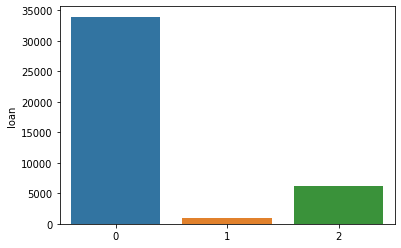

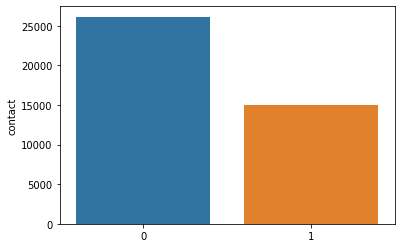

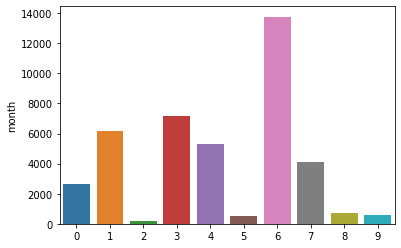

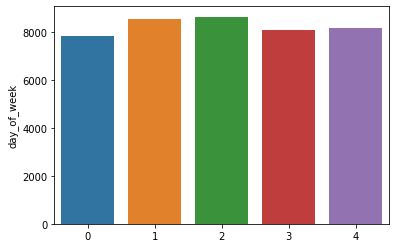

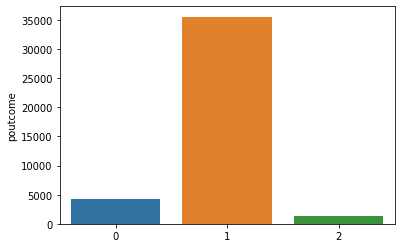

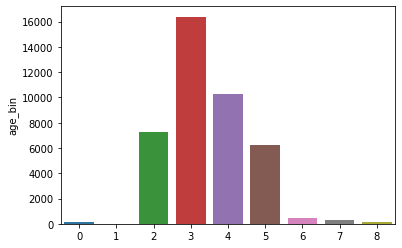

In [12]:
for i in bank_cust.columns:
    job_df = pd.DataFrame(bank_cust[i].value_counts())
    sns.barplot(x=job_df.index, y=job_df[i])
    plt.show()

# Using K-Mode with "Cao" initialization

In [13]:
km_cao=KModes(n_clusters=2, init = "Cao", n_init = 1, verbose=3)
fitClusters_cao = km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


##### n_init : int, default: 10

    Number of time the k-modes algorithm will be run with different centroid seeds. 
    The final results will be the best output of  n_init consecutive runs in terms of cost.

In [14]:
fitClusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

In [15]:
clusterCentroidsDf=pd.DataFrame(km_cao.cluster_centroids_)
clusterCentroidsDf

,0,1,2,3,4,5,6,7,8,9,10
0,0,1,6,0,2,0,0,6,2,1,3
1,1,1,3,0,0,0,1,6,0,1,4


In [16]:
clusterCentroidsDf.columns=bank_cust.columns
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,0,1,6,0,2,0,0,6,2,1,3
1,1,1,3,0,0,0,1,6,0,1,4


**Here are 2 cluster centres(Centroids) as shown above**

# Using K-Mode with "Huang" initialization

In [17]:
km_huang = KModes(n_clusters=2, init = "Huang", n_init = 1, verbose=1)
fitClusters_huang = km_huang.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6132, cost: 195354.0


In [18]:
fitClusters_huang

array([0, 0, 0, ..., 1, 0, 0], dtype=uint16)

In [19]:
clusterCentroidsDf=pd.DataFrame(km_huang.cluster_centroids_)
clusterCentroidsDf.columns=bank_cust.columns
clusterCentroidsDf

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin
0,1,1,2,0,2,0,1,6,0,1,3
1,0,1,6,0,2,0,0,3,1,1,3


# Choosing K by comparing Cost against each K

In [20]:
cost = []
for num_clusters in list(range(1,5)):
    kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
    kmode.fit_predict(bank_cust)
    cost.append(kmode.cost_)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 216952.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 4993, cost: 185138.0
Run 1, iteration: 2/100, moves: 1368, cost: 185138.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 6186, cost: 179774.0
Run 1, iteration: 2/100, moves: 1395, cost: 179774.0


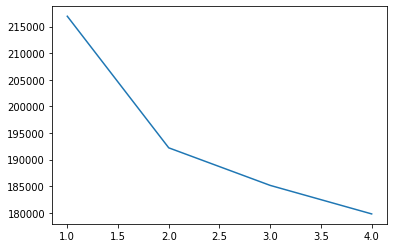

In [21]:
y = np.array([i for i in range(1,5,1)])
plt.plot(y,cost)

#### From here we find that  K=2 base on the cost 

In [22]:
km_cao=KModes(n_clusters=2,init="cao",n_init=1,verbose=2)
fitClusters_cao=km_cao.fit_predict(bank_cust)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 5322, cost: 192203.0
Run 1, iteration: 2/100, moves: 1160, cost: 192203.0


In [23]:
fitClusters_cao

array([1, 1, 0, ..., 0, 1, 0], dtype=uint16)

### Combining the predicted clusters with the original DF.

In [24]:
pd.DataFrame(fitClusters_cao)

,0
0,1
1,1
2,0
3,0
4,1
...,...
41183,0
41184,1
41185,0
41186,1


In [25]:
dt=pd.concat([bank_cust,pd.DataFrame(fitClusters_cao,columns=["cluster_predicted"])],axis=1,)
dt

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,cluster_predicted
0,3,1,0,0,0,0,1,6,1,1,5,1
1,7,1,3,1,0,0,1,6,1,1,5,1
2,7,1,3,0,2,0,1,6,1,1,3,0
3,0,1,1,0,0,0,1,6,1,1,3,0
4,7,1,3,0,0,2,1,6,1,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
41183,5,1,5,0,2,0,0,7,0,1,7,0
41184,1,1,5,0,0,0,0,7,0,1,4,1
41185,5,1,6,0,2,0,0,7,0,1,5,0
41186,9,1,5,0,0,0,0,7,0,1,4,1


### Separate cluster predicted 0 and 1 to each other

In [26]:
cluster_1=dt[dt["cluster_predicted"]==0]
cluster_1

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,cluster_predicted
2,7,1,3,0,2,0,1,6,1,1,3,0
3,0,1,1,0,0,0,1,6,1,1,3,0
8,9,2,5,0,2,0,1,6,1,1,2,0
13,3,0,0,0,2,0,1,6,1,1,5,0
14,1,1,1,0,2,0,1,6,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...
41181,0,1,6,0,2,0,0,7,0,1,3,0
41182,10,2,0,0,2,0,0,7,0,2,2,0
41183,5,1,5,0,2,0,0,7,0,1,7,0
41185,5,1,6,0,2,0,0,7,0,1,5,0


In [27]:
cluster_2=dt[dt["cluster_predicted"]==1]
cluster_2

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,age_bin,cluster_predicted
0,3,1,0,0,0,0,1,6,1,1,5,1
1,7,1,3,1,0,0,1,6,1,1,5,1
4,7,1,3,0,0,2,1,6,1,1,5,1
5,7,1,2,1,0,0,1,6,1,1,4,1
6,0,1,5,0,0,0,1,6,1,1,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...
41129,0,1,3,0,0,0,1,7,4,1,6,1
41143,9,2,5,0,0,2,0,7,0,2,2,1
41151,9,1,5,0,0,0,0,7,1,2,4,1
41184,1,1,5,0,0,0,0,7,0,1,4,1


In [28]:
cluster_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28293 entries, 2 to 41187
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job                28293 non-null  int32 
 1   marital            28293 non-null  int32 
 2   education          28293 non-null  int32 
 3   default            28293 non-null  int32 
 4   housing            28293 non-null  int32 
 5   loan               28293 non-null  int32 
 6   contact            28293 non-null  int32 
 7   month              28293 non-null  int32 
 8   day_of_week        28293 non-null  int32 
 9   poutcome           28293 non-null  int32 
 10  age_bin            28293 non-null  int32 
 11  cluster_predicted  28293 non-null  uint16
dtypes: int32(11), uint16(1)
memory usage: 1.5 MB


In [29]:
cluster_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12895 entries, 0 to 41186
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   job                12895 non-null  int32 
 1   marital            12895 non-null  int32 
 2   education          12895 non-null  int32 
 3   default            12895 non-null  int32 
 4   housing            12895 non-null  int32 
 5   loan               12895 non-null  int32 
 6   contact            12895 non-null  int32 
 7   month              12895 non-null  int32 
 8   day_of_week        12895 non-null  int32 
 9   poutcome           12895 non-null  int32 
 10  age_bin            12895 non-null  int32 
 11  cluster_predicted  12895 non-null  uint16
dtypes: int32(11), uint16(1)
memory usage: 680.0 KB


In [30]:
# Checking the count per category for JOB
job1_df = pd.DataFrame(cluster_1['job'].value_counts())
job0_df = pd.DataFrame(cluster_2['job'].value_counts())
job1_df

,job
0,9011
9,5082
1,4129
4,2268
7,2228
5,1261
6,1099
2,1022
3,690
10,669


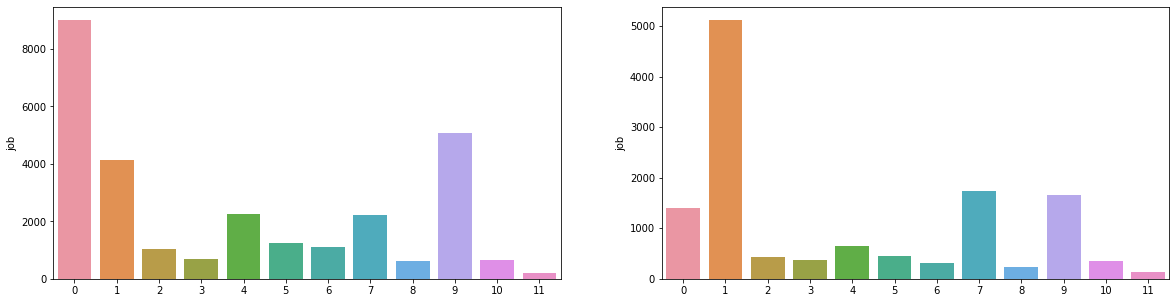

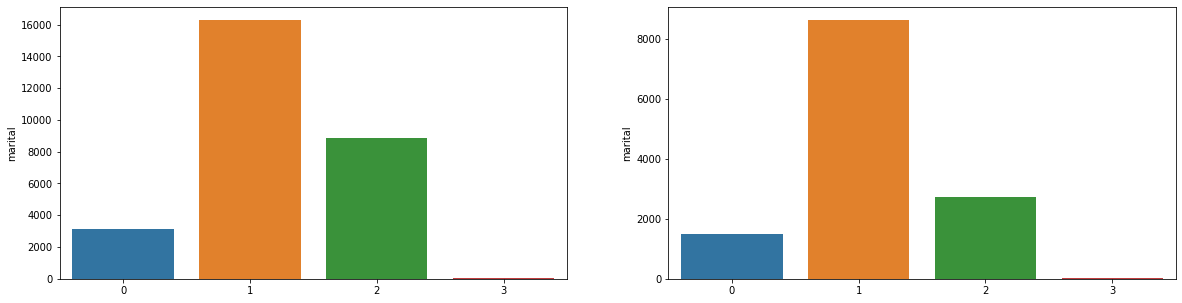

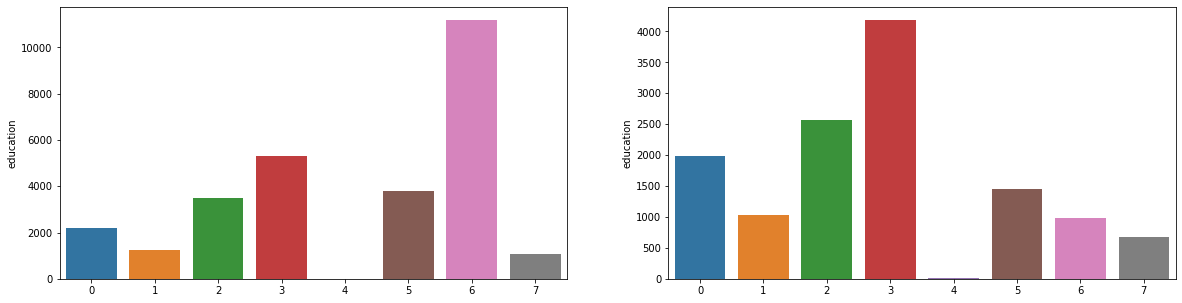

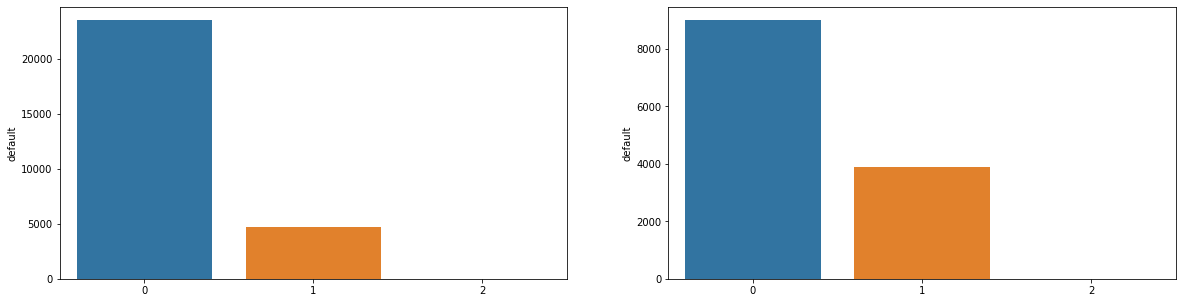

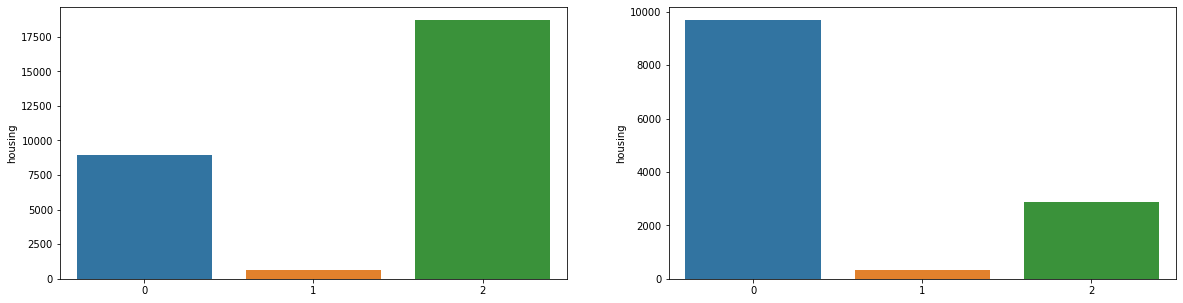

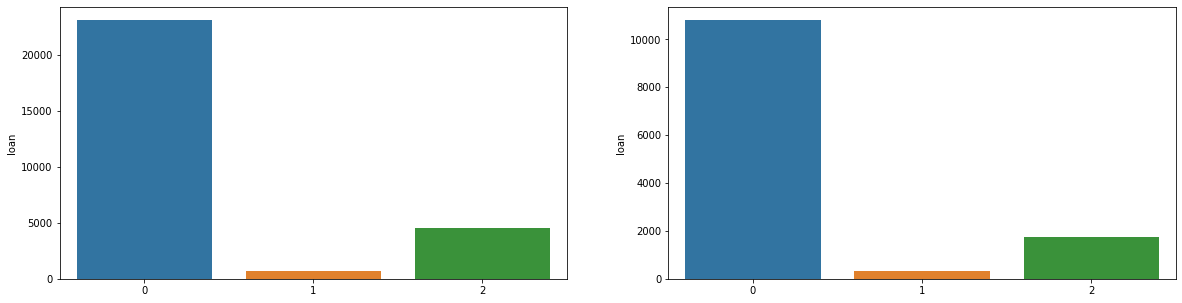

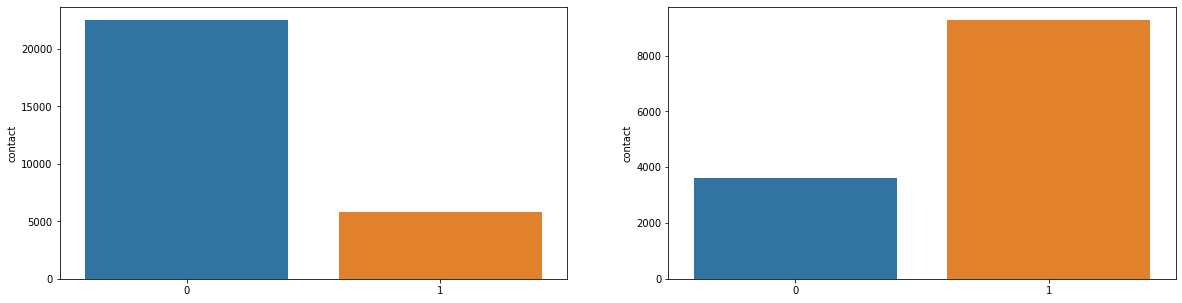

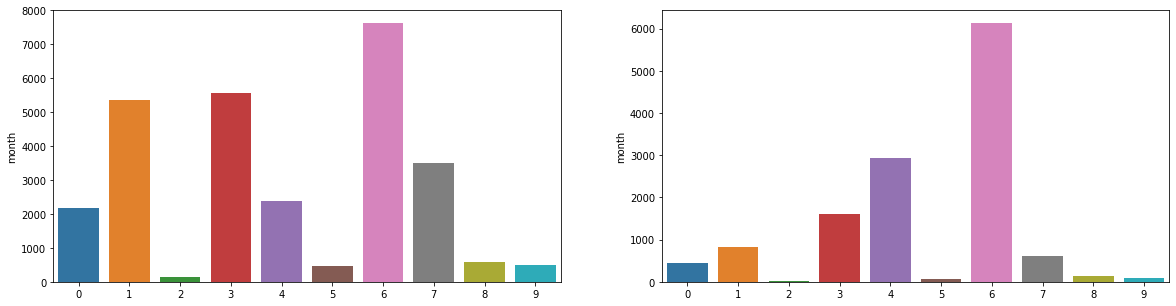

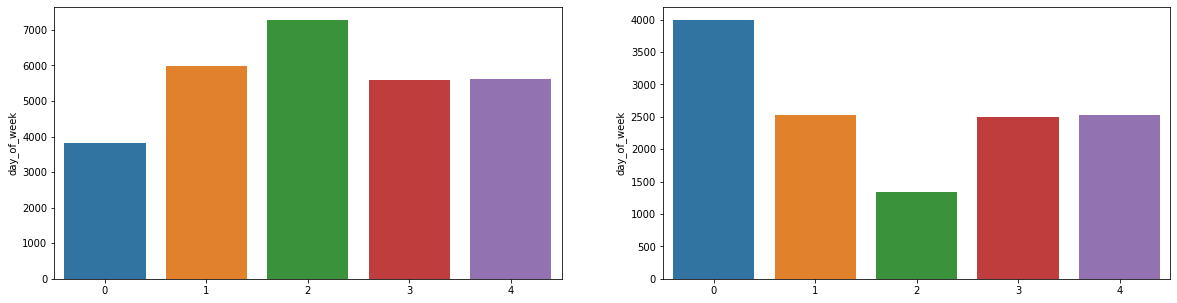

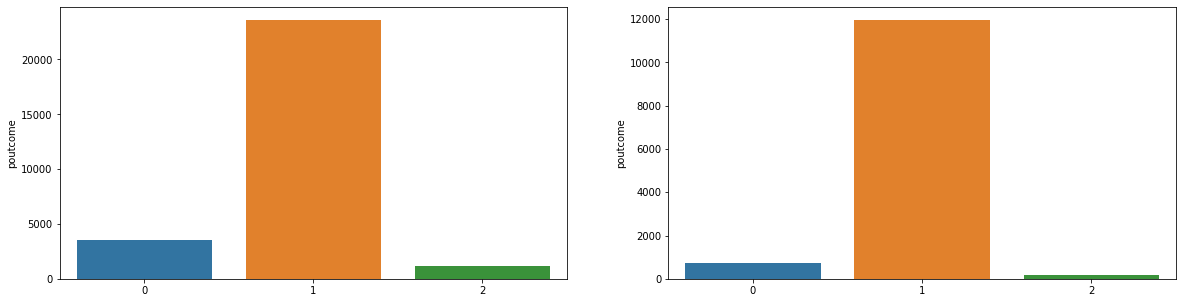

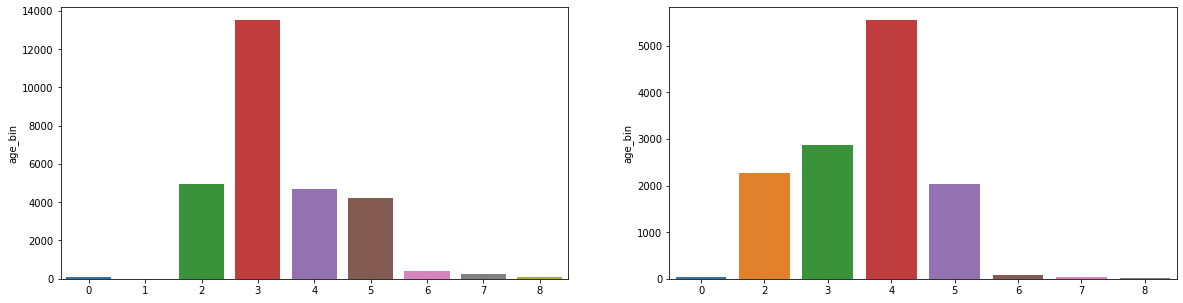

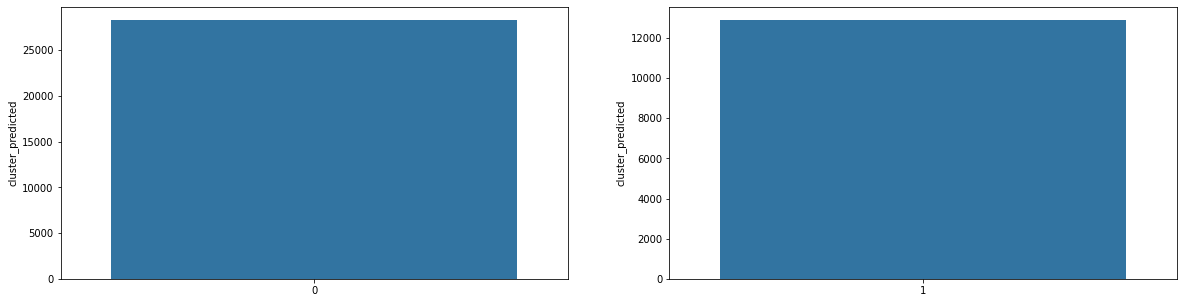

In [31]:
for  i in cluster_1.columns:
    job1_df = pd.DataFrame(cluster_1[i].value_counts())
    job0_df = pd.DataFrame(cluster_2[i].value_counts())
    fig,ax=plt.subplots(1,2,figsize=(20,5))
    sns.barplot(x=job1_df.index, y=job1_df[i], ax=ax[0])
    sns.barplot(x=job0_df.index, y=job0_df[i], ax=ax[1])
    fig.show()
    

## Here cluster_1 have "ADMIN jobs more and cluster_2 have "Blue Collar"jobs more

In [33]:
age1_df = pd.DataFrame(cluster_1['age_bin'].value_counts())
age0_df = pd.DataFrame(cluster_2['age_bin'].value_counts())

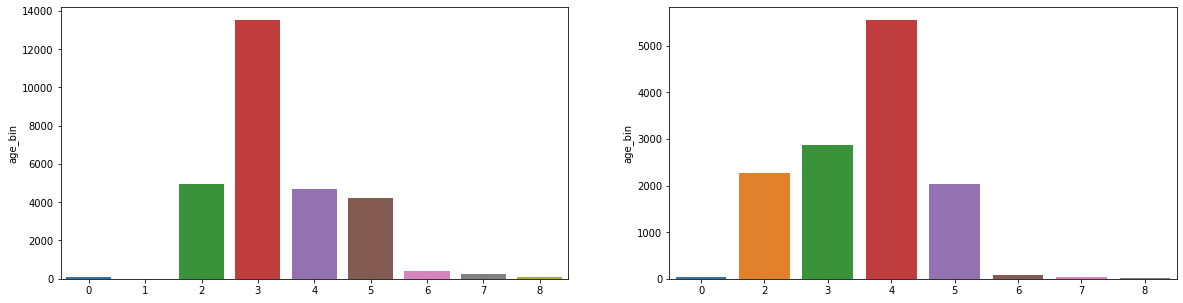

In [34]:
fig, ax =plt.subplots(1,2,figsize=(20,5))
sns.barplot(x=age1_df.index, y=age1_df['age_bin'], ax=ax[0])
sns.barplot(x=age0_df.index, y=age0_df['age_bin'], ax=ax[1])
fig.show()

# Evaluate Clusetrs
**Rand Index**

**Jaccard Index**

**Entropy**

### Note- 
**In Rand index-- we have to fnd the ground truth i.e we have to ourself made some cluster based on some business inteeligence or some other algo, then we have to compare with the actual and predicted cluster**

# K-Prototype Clustering

**About Blood Transfusion dataset**<br><br>
To demonstrate the RFMTC marketing model (a modified version of RFM), this study adopted the donor database of Blood Transfusion Service Center in Hsin-Chu City in Taiwan. The center passes their blood transfusion service bus to one university in Hsin-Chu City to gather blood donated about every three months. To build a FRMTC model, we selected 748 donors at random from the donor database. These 748 donor data, each one included R (Recency - months since last donation), F (Frequency - total number of donation), M (Monetary - total blood donated in c.c.), T (Time - months since first donation), and a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood).

**Attribute Information:**

- R (Recency - months since last donation), 
- F (Frequency - total number of donation), 
- M (Monetary - total blood donated in c.c.), 
- T (Time - months since first donation), 
- and a binary variable representing whether he/she donated blood in March 2007 (1 stand for donating blood; 0 stands for not donating blood). 

- Variable	Data Type	Measurement	Description	min	max	mean	std 
- Recency quantitative	Months	Input	0.03	74.4	9.74	8.07 
- Frequency quantitative	Times	Input	1	50	5.51	5.84 
- Monetary	quantitative	c.c. blood	Input	250	12500	1378.68	1459.83 
- Time quantitative	Months	Input	2.27	98.3	34.42	24.32 
- Whether he/she donated blood in March 2007	binary	1=yes 0=no	Output	0	1	1 (24%) 0 (76%) 

In [36]:
# Importing Libraries
import numpy as np
import pandas as pd
from kmodes.kprototypes import KPrototypes
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
# Reading Dataset
blood = pd.read_csv("transfusion.data")
blood.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


In [38]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [39]:
columns_to_normalize     = ['Recency (months)','Frequency (times)','Monetary (c.c. blood)','Time (months)']
blood[columns_to_normalize] = scaler.fit_transform(blood[columns_to_normalize])

In [40]:
blood.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,-0.927899,7.623346,7.623346,2.615633,1
1,-1.175118,1.282738,1.282738,-0.257881,1
2,-1.051508,1.796842,1.796842,0.029471,1
3,-0.927899,2.482313,2.482313,0.439973,1
4,-1.051508,3.167784,3.167784,1.753579,0


In [41]:
# For Kprottype we have to convert datasset into Matrix
# Converting the dataset into matrix
blood_matrix = np.array(blood)

In [42]:
blood_matrix

array([[-0.92789873,  7.62334626,  7.62334626,  2.61563344,  1.        ],
       [-1.17511806,  1.28273826,  1.28273826, -0.2578809 ,  1.        ],
       [-1.0515084 ,  1.79684161,  1.79684161,  0.02947053,  1.        ],
       ...,
       [ 1.66790417, -0.43093957, -0.43093957,  1.13782607,  0.        ],
       [ 3.64565877, -0.77367514, -0.77367514,  0.19367135,  0.        ],
       [ 7.72477762, -0.77367514, -0.77367514,  1.54832812,  0.        ]])

# Running K-Prototype clustering


In [43]:
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=5, init='Cao')
clusters = kproto.fit_predict(blood_matrix, categorical=[4])

**categorical : Index of columns that contain categorical data**

In [44]:
kproto.cluster_centroids_

array([[ 1.16746505, -0.50664088, -0.50664088, -0.18036377,  0.        ],
       [-0.64668675, -0.52090766, -0.52090766, -0.90254016,  0.        ],
       [-0.27750397,  0.23130882,  0.23130882,  0.56235591,  0.        ],
       [-0.52616733,  6.10245718,  6.10245718,  2.44630135,  1.        ],
       [-0.2712224 ,  1.63832641,  1.63832641,  1.42312499,  0.        ]])

In [45]:
# Checking the cost of the clusters created.
kproto.cost_

909.3070990110776

In [46]:
# Adding the predicted clusters to the main dataset
blood['cluster_id'] = clusters

In [47]:
# RE-Check
blood.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007,cluster_id
0,-0.927899,7.623346,7.623346,2.615633,1,3
1,-1.175118,1.282738,1.282738,-0.257881,1,2
2,-1.051508,1.796842,1.796842,0.029471,1,4
3,-0.927899,2.482313,2.482313,0.439973,1,4
4,-1.051508,3.167784,3.167784,1.753579,0,4


In [48]:
# Checking the clusters created, how many cluster are associated with each data points
blood["cluster_id"].value_counts()

1    240
2    214
0    206
4     80
3      8
Name: cluster_id, dtype: int64

<AxesSubplot:ylabel='cluster_id'>

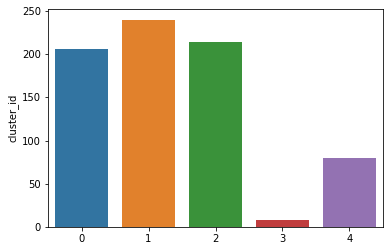

In [49]:
sns.barplot(x=blood["cluster_id"].value_counts().index,y=blood["cluster_id"].value_counts())

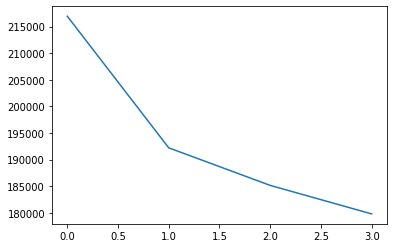

In [50]:
kproto = KPrototypes(n_clusters=5, init='Cao')
clusters = kproto.fit_predict(blood_matrix, categorical=[4])
plt.plot(cost)

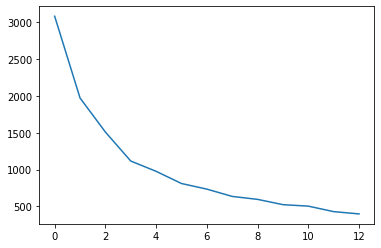

In [55]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,14)):
    kproto = KPrototypes(n_clusters=num_clusters,n_init=1, init='Cao')
    kproto.fit_predict(blood_matrix, categorical=[4])
    cost.append(kproto.cost_)
plt.plot(cost)

# DBSCAN ALGO

In [56]:
df1=pd.read_html("https://github.com/krishnaik06/DBSCAN-Algorithm/blob/master/Mall_Customers.csv")
len(df1)

1

In [57]:
df=df1[0]
df.head()

,Unnamed: 0,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,NaN,1,Male,19,15,39
1,NaN,2,Male,21,15,81
2,NaN,3,Female,20,16,6
3,NaN,4,Female,23,16,77
4,NaN,5,Female,31,17,40


In [58]:
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [59]:
# Selecting only 3 and 4 column
dset=df.iloc[:,[3,4]]
dset.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [60]:
X=dset.values
X

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

In [62]:
# Import Dbscan
from sklearn.cluster import DBSCAN
dbscan=DBSCAN(eps=3,min_samples=4)

In [63]:
# Fitting the model
model=dbscan.fit(X)

In [64]:
labels=model.labels_
labels

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  0,  0,  0,  0, -1, -1,  0, -1,  0, -1,  0,  0,
       -1,  0, -1, -1,  0, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1, -1,  2,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,
        2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  2,
        3,  3, -1,  3, -1, -1,  4, -1, -1, -1,  4,  5,  4, -1,  4,  5, -1,
        5,  4, -1,  4,  5, -1, -1,  6, -1, -1, -1,  7, -1,  6, -1,  6, -1,
        7, -1,  6, -1,  7, -1,  7, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  8, -1,  8, -1,  8, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [65]:
labels_1=pd.DataFrame(labels)
labels_1=pd.DataFrame(labels_1.value_counts(),columns=["count"]).reset_index()
labels_1

,0,count
0,-1,121
1,2,28
2,1,15
3,0,10
4,4,6
5,3,4
6,5,4
7,6,4
8,7,4
9,8,4


In [66]:
lab=labels_1.iloc[1::]
lab

,0,count
1,2,28
2,1,15
3,0,10
4,4,6
5,3,4
6,5,4
7,6,4
8,7,4
9,8,4


<AxesSubplot:xlabel='0', ylabel='count'>

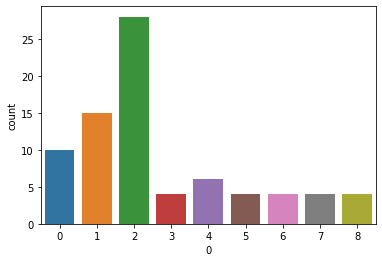

In [67]:
sns.barplot(x=lab[0],y=lab["count"])

***Here 9 clusters are formed -1 is noise not an cluster***

In [68]:
from sklearn import metrics

In [69]:
print(metrics.silhouette_score(X,labels))

-0.1908319132560097


This score is calulated based on avg mean of points which i calulted as -1 i.e noisy compared to other indicated as group cluster

## Krsih's Way

In [70]:
#identifying the points which makes up our core points
sample_cores=np.zeros_like(labels,dtype=bool)
sample_cores

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False,

In [71]:
sample_cores[dbscan.core_sample_indices_]=True
sample_cores

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True,  True, False, False,  True,
       False,  True, False,  True,  True, False,  True, False, False,
        True, False,  True,  True,  True,  True,  True, False,  True,
        True, False,  True, False,  True, False,  True, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False,

In [72]:
#Calculating the number of clusters

n_clusters=len(set(labels))- (1 if -1 in labels else 0)
n_clusters

9